# Leveraging UnDatas.io and DeepSeek to Analyze Tesla Gen Report 2: Intelligent Question Answering Unveiled


![](example_content/undatasio_example.png)

## A recipe 🧑‍💻 📄 🤖
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tDBwaqiS0xunXlN22U5-9NLqAytjOmuO#scrollTo=Cf2grXOqWXuk)


By xll, Tech Enthusiast @ Undatasio

This is a code recipe that harnesses the power of the [Undatas.io](https://undatas.io/) platform and the advanced [deepseek model](https://deepseek.com/) to unlock crucial insights from the Tesla Gen report.

In this notebook, we'll execute the following steps:

👍1. Laying the Foundation: Installing and Configuring
- Install the Undatasio Python API library
- Initialize the OpenAI object for deepseek integration

🤖2. Unearthing Hidden Gems: Data Extraction from Tsla-gen-report
- Leverage the show_version function of the Undatasio object
- Pinpoint key data: This notebook zeroes in on the table within the first Financial Summary of [tsla-20241023-gen.pdf](https://ir.tesla.com/_flysystem/s3/sec/000162828024043432/tsla-20241023-gen.pdf) as our prime sample content. As illustrated in the figures accompanying this recipe, this data will serve as the foundation for our in-depth exploration, holding valuable financial and operational details about Tesla's business.

📄3. Unlocking Insights: Deep Dive into Intelligent Questioning
- Set up the deepseek-chat model
- Pose targeted questions


To run this notebook successfully, you'll need:
- An [Undatas.io API key](https://platform.undatas.io/) procured from the official Undatas.io platform. This key unlocks the platform's full suite of data extraction and manipulation features.
- An [OpenAI API key](https://platform.openai.com/docs/quickstart) obtained following OpenAI's official process. Ensure you've completed all necessary registration and verification steps to gain access to the deepseek model via OpenAI's infrastructure.


## 👍1. Setting Up UnDatas.io and Integrating with OpenAI's deepseek
Installing the Undatasio Python API library

In [ ]:
!pip install -U -q openai undatasio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.8/195.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00


 To import an **UnDataIO** object, you need a token and an optional task name from the Undatasio platform.

In [ ]:
from undatasio.undatasio import UnDatasIO

undatasio_obj = UnDatasIO(UNDATASIO_API_KEY, task_name='PdfParserDemo')

## 🐥2. Extracting Valuable Information from Tsla-gen-report
The **show_version** function of the generated Undatasio object can display all version information and file lists for the current token's task name.

In [ ]:
version_data = undatasio_obj.show_version()
version_data.data

,title,version,count,file_name
0,1 files,v4,1,[tsla-20241023-gen_test02.pdf]
1,1 files,v3,1,[tsla-20241023-gen_test2.pdf]
2,1 files,v2,1,[tsla-20241023-gen_test.pdf]
3,4 files,v1,4,"[PureTable.pdf, PureFormula.pdf, EditablePureT..."


You can use the **get_result_type** method of the **Undatasio** object to retrieve text information, images, tables, titles, or interline equation information from a PDF file.

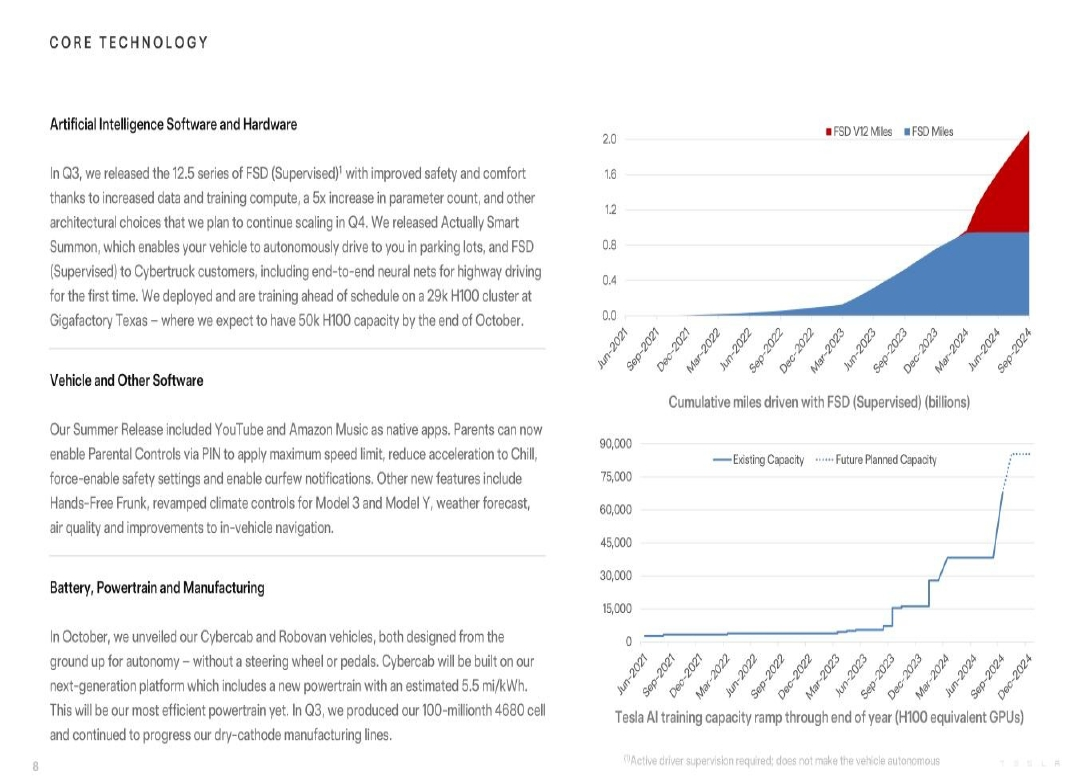

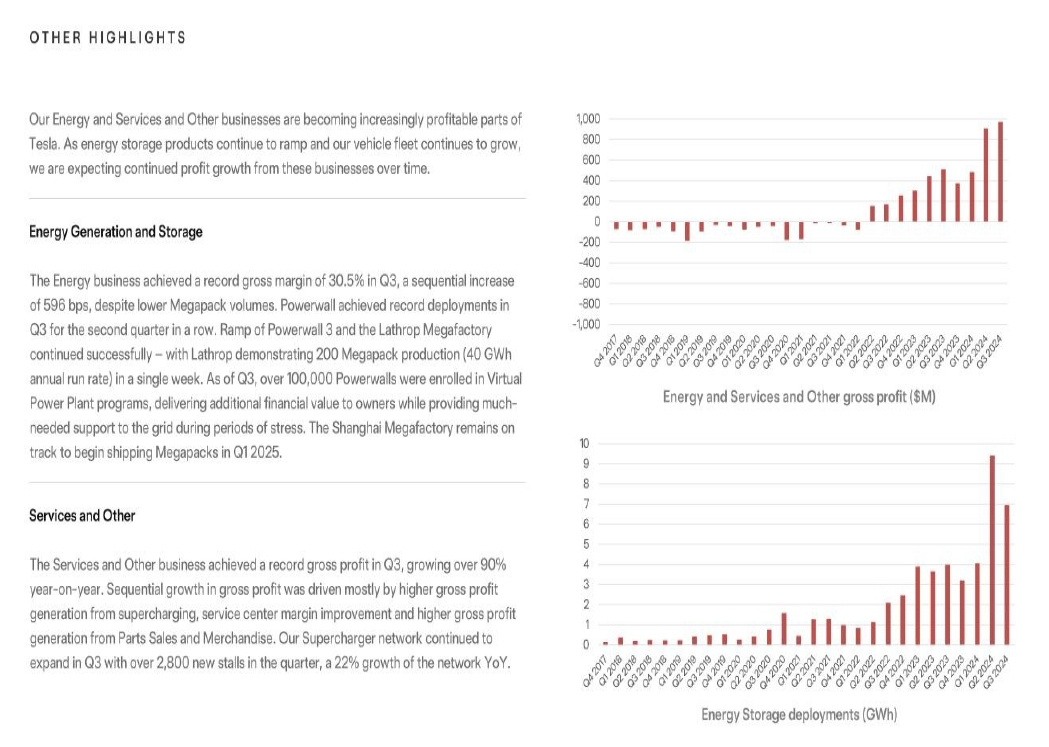

This notebook will select the table in the first Financial Summary of tsla-20241023-gen.pdf as the sample content, as shown in the figure above.

In [ ]:
result = undatasio_obj.get_result_type(
    type_info=['title', 'table', 'text', 'image', 'interline_equation'],
    # type_info=['table'],
    file_name='tsla-20241023-gen_test02.pdf',
    version='v4'
)
print(result.data)

CORE TECHNOLOGY
ArtificialIntelligenceSoftwareandHardware
InQ3,wereleased the12.5seriesofFSD(Supervised)withimprovedsafetyandcomfort
thankstoincreased data andtraining compute,a5xincreaseinparametercount,andother
architectural choicesthatweplantocontinuescalinginQ4.WereleasedActuallySmart
Summon,whichenablesyourvehicletoautonomouslydrivetoyouinparkinglots,andFD
(Supervised)toCybertruckcustomers,includingend-to-endneuralnetsforhighwaydriving
forthefirst time.Wedeployed andaretraining aheadofschedule ona29kH100clusterat
GigafactoryTexas-whereweexpecttohave50kH100capacitybytheendofOctober
VehicleandOtherSoftware
OurSummer ReleaseincludedYouTubeandAmazonMusicasnative apps.Parentscannow
enableParental ControlsviaPINtoapplymaximumspeedlimit,reduceaccelerationtoChill
force-enablesafetysettings andenablecurfewnotifications.Othernewfeaturesinclude
Hands-FreeFrunk,revampedclmatecontrolsforModel3andModelY,weatherforecast
airqualityandimprovementstoin-vehiclenavigation
Battery，PowertrainandManufac

## 🥰3. Deep Dive into Intelligent Questioning


Initialize the OpenAI object. You need to apply for an API key yourself.

In [ ]:
from openai import OpenAI

client = OpenAI(
    api_key=os.getenv("API_KEY"),
    base_url="https://api.deepseek.com"
)

## Use deepseek-chat model and set the system and user prompts.


### Question 1: What new features were included in the Summer Release of Tesla's vehicle software?
We ask a question over the parsed markdown and get back the right answer! We also ask a question over the text.

In [ ]:
query1 = "What new features were included in the Summer Release of Tesla's vehicle software?"

In [ ]:
response = client.chat.completions.create(
        model="deepseek-chat",
        messages=[
            {"role": "system", "content": "You are a data analysis expert. Please extract information from the data provided by the user. Note that only the information asked by the user should be returned, and nothing else should be returned. Data: %s" % (result.data, )},
            {"role": "user", "content": query1},
        ],
        stream=False
    )


In [ ]:
res_data = response.choices[0].message.content
res_data

"The new features included in the Summer Release of Tesla's vehicle software are:\n- YouTube and Amazon Music as native apps.\n- Parental Controls via PIN to apply maximum speed limit, reduce acceleration to Chill, force-enable safety settings, and enable curfew notifications.\n- Hands-Free Frunk.\n- Revamped climate controls for Model 3 and Model Y.\n- Weather forecast and air quality improvements in-vehicle navigation."

show the result above:

The new features included in the Summer Release of Tesla's vehicle software are:
- YouTube and Amazon Music as native apps.
- Parental Controls via PIN to apply maximum speed limit, reduce acceleration to Chill, force-enable safety settings, and enable curfew notifications.
- Hands-Free Frunk.
- Revamped climate controls for Model 3 and Model Y.
- Weather forecast and air quality improvements in-vehicle navigation.

### Question 2: How did the Energy business perform in Q3 in terms of gross margin?

Let's also try asking a question over another piece of the text.

In [ ]:
query2 = 'How did the Energy business perform in Q3 in terms of gross margin?'

In [ ]:
response = client.chat.completions.create(
        model="deepseek-chat",
        messages=[
            {"role": "system", "content": "You are a data analysis expert. Please extract information from the data provided by the user. Note that only the information asked by the user should be returned, and nothing else should be returned. Data: %s" % (result.data, )},
            {"role": "user", "content": query2},
        ],
        stream=False
    )


In [ ]:
res_data = response.choices[0].message.content
res_data

'The Energy business achieved a record gross margin of 30.5% in Q3, a sequential increase of 596 basis points.'